## LLM Prompting In-class walkthrough

Includes:
a) Walkthrough of prompting principles and examples.
b) Also includes In-class exercise for a bonus 2% credit towards overall grade.

## Install Libraries

In [ ]:
!pip3 install openai
!pip3 install python-dotenv

## Connect Google Colab to your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
print(os.system('ls'))

#os.chdir(os.curdir + "/drive/MyDrive/Colab_Demo_ChatGPT")
os.chdir(os.curdir + "/drive/MyDrive/Colab_Notebooks_LLM_2023")

MessageError: Error: credential propagation was unsuccessful

## OPEN AI ACCESS

In [ ]:
import openai
import os

# open_ai_key_file = "openai_api_key_llm_2023.txt" # Your OPEN AI Key in this file
# with open(open_ai_key_file, "r") as f:
#   for line in f:
#     OPENAI_KEY = line
#     break

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())


openai.api_key  = 'PLACEHOLDER'
OPENAI_KEY = openai.api_key

## Response from OPEN AI

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_KEY)
def get_completion_instruct(prompt, model="gpt-3.5-turbo-instruct"):
    response = client.completions.create(
        model=model,
        prompt=prompt
    )
    #return response.choices[0].text
    return response.choices[0].text

def get_completion(prompt, model="gpt-4o"):
  message = {"role": "user", "content": prompt}
  response = client.chat.completions.create(
      model=model,
      messages=[message]
  )
  return response.choices[0].message.content

## Visual Steps Task based on a given example

In [ ]:
prompt = f"""Make the bed steps are :
put the sheet on the bed
insert the quilt into the quilt cover
put the quilt on the bed
insert the pillow into the pillow cover
put the pillow on the bed.   Similarly, provide the steps of "fix my flat tire" that are visually seen and number them. No need to explain the steps."""

model = "gpt-3.5-turbo-instruct"
response = get_completion_instruct(prompt,model)
print("model = ", model)
print(response)
print("\n\n")

model = "gpt-3.5-turbo"
print("model = ", model)
print("\n")
response = get_completion(prompt,model)
print(response)
print("\n\n")

model = "gpt-4o"
print("model = ", model)
print("\n")
response = get_completion(prompt,model)
print(response)

model =  gpt-3.5-turbo-instruct


1. Locate the flat tire and ensure the car is in a safe,



model =  gpt-3.5-turbo


1. Remove the tire from the vehicle
2. Locate the source of the flat
3. Remove the puncturing object
4. Patch or replace the inner tube
5. Re-inflate the tire
6. Reattach the tire to the vehicle



model =  gpt-4o


1. Secure the vehicle with the parking brake and wheel wedges.  
2. Remove the hubcap or wheel cover (if applicable).  
3. Loosen the lug nuts with a lug wrench.  
4. Position the jack under the vehicle's jacking point.  
5. Lift the vehicle with the jack.  
6. Remove the loosened lug nuts completely.  
7. Remove the flat tire from the wheel hub.  
8. Place the spare tire onto the wheel hub.  
9. Hand-tighten the lug nuts onto the spare tire.  
10. Lower the vehicle using the jack.  
11. Fully tighten the lug nuts in a crisscross pattern.  
12. Replace the hubcap or wheel cover (if applicable).  


## Prompt for KeyWord Extraction

In [ ]:
def get_keywords_from_text(text_list):
  if not isinstance(text_list,list):
    text_list = [text_list]

  num_strings = len(text_list)

  prompt = f"""
  Here's a list of """ + str(num_strings) + f""" string given by the text delimited by 3 quotes: ```{text_list}```.
  For each string in the list, generate at least two key words and at most 3 key words.
  Return result as a list.
  The key word should be relevant to the text
  and each key word can capture a different popular theme of interest for wisdom
  seekers.
  The key word doesn't have to be present in the text. Also key word shouldn't
  have a space in it.
  """


  responses = get_completion(prompt)

  return responses

In [ ]:
text = """
  BECOMING DEFENSELESS

Whenever a boundary is broken, it creates some fear. The fear creates dislike. This dislike puts us back in the boundary. And to keep yourself in the boundary you put forth defenses. When you try to defend your position, it is such a stress, isn't it? And every time you try to defend your position it makes you more and more weak.

On the path, people even use the Knowledge as a defense against criticism! Don't use Knowledge as a defense.

The Knowledge is like an umbrella for you -- a shelter, not a weapon. Of course, sometimes "Don't use Knowledge as a weapon" becomes an excuse not to be in Knowledge! (Laughter)

I say, drop all your defenses. Anybody can make a mistake. Even you!

Don't defend your mistakes. Just accept them and move on. When you are totally defenseless, that's when you'll be strong.

  """

print(get_keywords_from_text(text))

```['Defenselessness', 'Acceptance', 'Strength']```


## Download and Load Data

In [ ]:
def load_all_data(web_link):
  """
  Each data point/text is one page from a book
  """
  path = "wisdom"
  files = os.listdir(path)

  text_dict = {}
  for file in files:
    with open(path + "/" + file, "r") as f:
      sheet = f.readlines()
      sheet = [line.strip("\n") for line in sheet]
      sheet = [line for line in sheet if line]
      # Return the sheet as a single string
      text_dict[file.split(".")[0]] = " ".join(sheet)

  return text_dict

def load_all_data_from_path(path):

  text_dict = {}
  with open(path, "r") as f:
    index = 0
    for line in f:
      text_dict[index] = line.strip("\n")
      index += 1

  return text_dict

# Download data to "quotes.txt" file
!wget https://gist.githubusercontent.com/robatron/a66acc0eed3835119817/raw/77493d3ddf69fbd9d69997e22e1a7c6c70c8bdf2/quotes.txt
path = "quotes.txt"
text_dict = load_all_data_from_path(path)

--2025-02-07 05:13:06--  https://gist.githubusercontent.com/robatron/a66acc0eed3835119817/raw/77493d3ddf69fbd9d69997e22e1a7c6c70c8bdf2/quotes.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10641 (10K) [text/plain]
Saving to: ‘quotes.txt.1’

quotes.txt.1        100%[===================>]  10.39K  --.-KB/s    in 0s      

2025-02-07 05:13:06 (115 MB/s) - ‘quotes.txt.1’ saved [10641/10641]



In [ ]:
text_dict

{0: 'If you want to achieve greatness stop asking for permission. ~Anonymous',
 1: 'Things work out best for those who make the best of how things work out. ~John Wooden',
 2: 'To live a creative life, we must lose our fear of being wrong. ~Anonymous',
 3: 'If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn',
 4: "Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous",
 5: 'Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and just leave every other idea alone. This is the way to success. ~Swami Vivekananda',
 6: 'All our dreams can come true if we have the courage to pursue them. ~Walt Disney',
 7: 'Good things come to people who wait, but better things come to those who go out and get them. ~Anonymous',
 8: 'If you do what you always did, you will get what you always got. ~Anonymou

In [ ]:
!ls

quotes.txt  quotes.txt.1  sample_data


## Generate Keywords for Hundreds of Docs

In [ ]:
import time

def generate_keywords_for_single_text(text):

  prompt = f"""
  Here's a text  de-limited by 3 quotes: ```{text}```.
  Generate three distinct keywords that capture the most important topics in the text.
  The key word doesn't have to be present in the text. Also key word shouldn't
  have a space in it. Make sure the key word is just one word and not two words joined.
  """

  #Make sure the key word is just one word and not two words joined.

  response = get_completion(prompt)

  return response


def generate_keywords_for_all_text(text_dict):

  keywords_dict = {}
  count = 0
  count_max = 17
  for key in text_dict:
    text = text_dict[key]
    response = generate_keywords_for_single_text(text)
    keywords_dict[key] = response
    print("key = ", key)
    print(text)
    print(response)
    print("\n")
    time.sleep(0.3)
    count += 1
    if count > count_max:
      break

## Application 1:
## Generating Keywords for Hundreds of texts

In [ ]:
generate_keywords_for_all_text(text_dict)

key =  0
If you want to achieve greatness stop asking for permission. ~Anonymous
1. Greatness  
2. Ambition  
3. Independence


key =  1
Things work out best for those who make the best of how things work out. ~John Wooden
1. Optimism  
2. Resilience  
3. Perspective  


key =  2
To live a creative life, we must lose our fear of being wrong. ~Anonymous
1. Creativity  
2. Fear  
3. Mistakes  


key =  3
If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn
1. Risk  
2. Ambition  
3. Success  


key =  4
Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous
1. Trust  
2. Risk  
3. Uncertainty


key =  5
Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and just leave every other idea alone. This is the way to success. ~Swami Vivekananda
1. Focus  
2. Dedication  
3. Success


key =  6
All

## Application 2:
## Data Augmentation: Generate questions for the text to form Q,A pairs that can be used for model training

In [ ]:
def generate_questions_for_single_text(text):

  prompt = f"""
  Here's a text  de-limited by 3 quotes: ```{text}```.
  Generate two distinct questions whose answer would be the text.
  Limit the length of question to 100 characters
  and keep the questions practical and relevant to people's lives. Also make
  the question a good match to the text as a answer. One question should be something
  a 5 year old wold ask and the second question is something a mature adult would ask.
  """

  response = get_completion(prompt)

  return response

def generate_questions_for_all_knowledge_sheets(text_dict):

  questions_dict = {}
  count = 0
  count_max = 9
  for key in text_dict:
    text = text_dict[key]
    success = False
    while not success:
      try:
        response = generate_questions_for_single_text(text)
      except:
        print("Going to try again...")
        time.sleep(0.1)
        continue
      success = True
    questions_dict[key] = response
    print("key = ", key)
    print(response)
    print(text)
    print("\n")
    count += 1
    if count > count_max:
      break

In [ ]:
generate_questions_for_all_knowledge_sheets(text_dict)

key =  0
1. Why should I try doing things by myself instead of waiting for someone to say it's okay?
2. How can I cultivate a mindset of independence and self-reliance to achieve my goals?
If you want to achieve greatness stop asking for permission. ~Anonymous


key =  1
1. What should I do if I want things to turn out well when they don't seem to?
2. How do successful people maintain a positive outlook despite life's challenges?
Things work out best for those who make the best of how things work out. ~John Wooden


key =  2
1. Why is it okay to make mistakes when we're trying to create something new?  
2. How can embracing failure enhance our capacity for creative thinking?
To live a creative life, we must lose our fear of being wrong. ~Anonymous


key =  3
1. Why can't you always do fun and easy things, Mom?  
2. How do successful people view taking risks in their careers?
If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn


key =  4
1. Why s

## In-Class Exercise 2 (Bonus 2% of overall class grade for completion)

We will now do an in-class exercise that explores the ideas of:

a) prompt engineering
b) data augmentation and
c) evaluate SBERT baseline with prompt-engineering based data augmentation.

Submission:
You can submit the jupyter notebook of this class exercise as a submission on canvas.
Each step below should be in a separate cell of jupyter notebook and should show the results post execution of the cell (this assists ease of grading).

Steps to execute for ICE:

1) Run all cells in the notebook and verify that they all work and you are getting results as expected. If not - fix any bugs, permission issues, etc.

2) Pick 5 classes for the "text reference" used in this notebook or for your own ".txt" file that are relevant. For example for this text, maybe I would pick 5 classes as follows: a) time management b) success c) persistence d) courage e) growth
You can also ask gpt to return 5 topics that it thinks encapsulate all sentences in the text

3) Ask GPT (any version you want to use) to annotate each sentence in the ".txt" file with one of the 5 classes you identified in step 2. You can use a suitable prompt for this.

4) Use SBERT to make predictions for each of the sentences in ".txt" file - The prediction should be one of the 5 classes identified in step 2.

5) Generate a heat map of the confusion matrix based on SBERT predictions and the ground truth you indentified in step 3.

6) How well is SBERT doing on your annotated data?

## Step 2

In [ ]:
topics = ["time management", "success", "persistence", "courage", "growth"]

### Step 3

In [ ]:
def generate_topic_for_single_text(text):

  prompt = f"""
  Here's a text  de-limited by 3 quotes: ```{text}```.
  Pick one and only one topic that best describes the text from the following list: {", ".join(topics)}.

  GUIDELINES:
  - Pick only one of the topics from the list.
  - The key word doesn't have to be present in the sentence.

  Format your output as follows:
  Topic: <name of the topic>
  """

  #Make sure the key word is just one word and not two words joined.

  response = get_completion(prompt, 'o1-mini')

  return response


def generate_topics_for_all_text(text_dict):
  keywords_dict = {}
  gpt_preds = []
  for key in text_dict:
    text = text_dict[key]
    response = generate_topic_for_single_text(text)
    keywords_dict[key] = response
    gpt_preds.append(topics.index(response.split(":")[1].strip().lower()))
    print("key = ", key)
    print(text)
    print(response)
    print("\n")
    time.sleep(0.3)

  return gpt_preds

In [ ]:
gpt_preds = generate_topics_for_all_text(text_dict)

key =  0
If you want to achieve greatness stop asking for permission. ~Anonymous
Topic: courage


key =  1
Things work out best for those who make the best of how things work out. ~John Wooden
Topic: success


key =  2
To live a creative life, we must lose our fear of being wrong. ~Anonymous
Topic: Courage


key =  3
If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn
Topic: Courage


key =  4
Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous
Topic: courage


key =  5
Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and just leave every other idea alone. This is the way to success. ~Swami Vivekananda
Topic: success


key =  6
All our dreams can come true if we have the courage to pursue them. ~Walt Disney
Topic: Courage


key =  7
Good things come to people who wait, but better t

## Step 4

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

model = SentenceTransformer('all-MiniLM-L6-v2')

sentences = list(text_dict.values())
topic_embeddings = model.encode(topics)
sentence_embeddings = model.encode(sentences)

similarities = model.similarity(sentence_embeddings, topic_embeddings)

sbert_preds = []
for i, sentence in enumerate(sentences):
    best_topic_idx = torch.argmax(similarities[i]).item()
    best_topic = topics[best_topic_idx]
    sbert_preds.append(best_topic_idx)
    print(f"Sentence: {sentence}")
    print(f"Predicted Topic: {best_topic}\n")


Sentence: If you want to achieve greatness stop asking for permission. ~Anonymous
Predicted Topic: success

Sentence: Things work out best for those who make the best of how things work out. ~John Wooden
Predicted Topic: success

Sentence: To live a creative life, we must lose our fear of being wrong. ~Anonymous
Predicted Topic: courage

Sentence: If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn
Predicted Topic: courage

Sentence: Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous
Predicted Topic: courage

Sentence: Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and just leave every other idea alone. This is the way to success. ~Swami Vivekananda
Predicted Topic: success

Sentence: All our dreams can come true if we have the courage to pursue them. ~Walt Disney
Predicted Topi

## Step 5

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [ ]:
print(len(gpt_preds), len(sbert_preds))

99 99


In [ ]:
print(set(gpt_preds))
print(set(sbert_preds))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


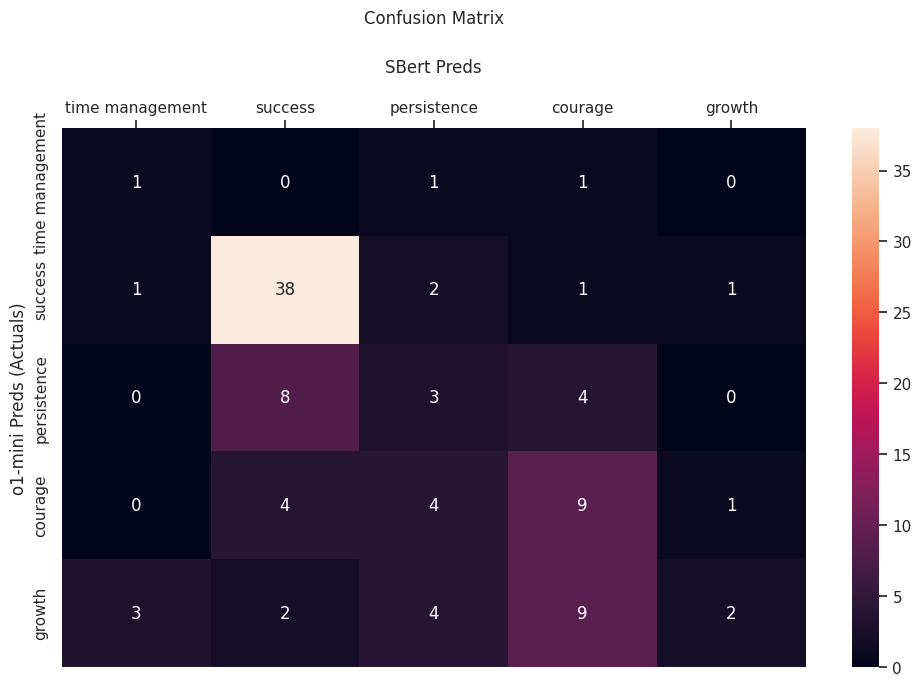

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    confusion_matrix(gpt_preds, sbert_preds),
    annot=True,
    fmt='g',
    cbar=True,
    xticklabels=topics,
    yticklabels=topics
)

plt.xlabel('SBert Preds', labelpad=20)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.ylabel('o1-mini Preds (Actuals)')
plt.title('Confusion Matrix', pad=25)

plt.show()

## Step 6

SBert didn't perform well against o1-mini. SBert recevievd about ~53% accuracy.  

